In [51]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

#Visualization
import plotly.plotly as py
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

# data
from total_export_data import *
# data management
import pandas as pd
import numpy as np
import networkx as nx


In [2]:
file = 'downloads/country_partner_hsproduct4digit_year_2016.csv'
df = pd.read_csv(file)

/Users/phuongpham/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,year,export_value,import_value,hs_eci,hs_coi,sitc_eci,sitc_coi,pci,location_code,location_name_short_en,partner_code,partner_name_short_en,hs_product_code,hs_product_name_short_en
0,2016,3410,0,0.700195,-0.700967,0.739432,-0.455560,-0.029638,ABW,Aruba,AUT,Austria,7113,Jewelry of precious metal
1,2016,668,0,-1.248418,-1.230341,-1.132229,-1.185357,-0.029638,AFG,Afghanistan,AUT,Austria,7113,Jewelry of precious metal
2,2016,296299,554421,0.350693,-0.188107,0.162353,-0.133581,-0.029638,ARE,United Arab Emirates,AUT,Austria,7113,Jewelry of precious metal
3,2016,1461,100873,0.008851,-0.678394,-0.060440,-0.665256,-0.029638,ARM,Armenia,AUT,Austria,7113,Jewelry of precious metal
4,2016,103827,364482,-0.171243,-0.046290,-0.591569,-0.279302,-0.029638,AUS,Australia,AUT,Austria,7113,Jewelry of precious metal


In [4]:
# all_goods = df[['hs_product_code','hs_product_name_short_en']].drop_duplicates()

In [5]:
# all_goods[all_goods['hs_product_code']=='XXXX']

In [6]:
# Drop Trade data discrepancies XXXX
# all_good_final = all_goods.drop(3914227, axis =0)

In [7]:
# all_good_final['hs_product_code'] = all_good_final['hs_product_code'].apply(pd.to_numeric)

In [8]:
# all_good_by_category = all_good_final.sort_values(by = 'hs_product_code')

In [9]:
# all_good_by_category.head()

In [10]:
df_clean = df[df['hs_product_code'] !='XXXX']

In [17]:
df_clean['hs_product_code'] = df_clean['hs_product_code'].apply(int)

/Users/phuongpham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_clean['category_code'] = df_clean['hs_product_code'].apply(lambda x : x//100)

/Users/phuongpham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_clean.head()

,year,export_value,import_value,hs_eci,hs_coi,sitc_eci,sitc_coi,pci,location_code,location_name_short_en,partner_code,partner_name_short_en,hs_product_code,hs_product_name_short_en,category_code
0,2016,3410,0,0.700195,-0.700967,0.739432,-0.455560,-0.029638,ABW,Aruba,AUT,Austria,7113,Jewelry of precious metal,71
1,2016,668,0,-1.248418,-1.230341,-1.132229,-1.185357,-0.029638,AFG,Afghanistan,AUT,Austria,7113,Jewelry of precious metal,71
2,2016,296299,554421,0.350693,-0.188107,0.162353,-0.133581,-0.029638,ARE,United Arab Emirates,AUT,Austria,7113,Jewelry of precious metal,71
3,2016,1461,100873,0.008851,-0.678394,-0.060440,-0.665256,-0.029638,ARM,Armenia,AUT,Austria,7113,Jewelry of precious metal,71
4,2016,103827,364482,-0.171243,-0.046290,-0.591569,-0.279302,-0.029638,AUS,Australia,AUT,Austria,7113,Jewelry of precious metal,71


In [25]:
df_group_category = df_clean.groupby(['category_code'])['export_value'].sum().reset_index(name = 'total_export')

In [26]:
total_export = df_group_category['total_export'].sum()

In [27]:
df_group_category['export_proportion'] = df_group_category['total_export']/total_export

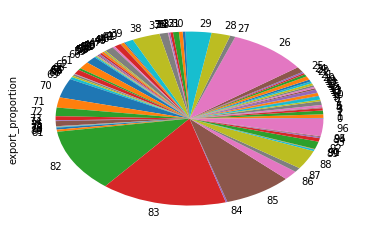

In [48]:
plot = df_group_category.plot.pie(y = 'export_proportion', legend=False)
plt.show()

In [44]:
sort_df_group_category = df_group_category.sort_values('export_proportion')

In [45]:
sort_df_group_category.tail(10)

,category_code,total_export,export_proportion
28,29,367425659497,0.022766
29,30,503233700192,0.031181
96,99,526428911186,0.032619
38,39,540307946884,0.033479
88,90,572598164560,0.035479
70,71,574928051553,0.035624
85,87,1328197151478,0.082298
26,27,1520016377456,0.094183
82,84,1894138273922,0.117365
83,85,2454270812295,0.152072


In [64]:
df_group_category_85 = df_clean[(df_clean['category_code'] == 85) | (df_clean['category_code'] == 84)]

In [65]:
df_group_category_85.head()

,year,export_value,import_value,hs_eci,hs_coi,sitc_eci,sitc_coi,pci,location_code,location_name_short_en,partner_code,partner_name_short_en,hs_product_code,hs_product_name_short_en,category_code
21690,2016,347,2152,-1.248418,-1.230341,-1.132229,-1.185357,0.823996,AFG,Afghanistan,AUT,Austria,8471,Computers,84
21691,2016,304,0,-1.099318,-1.187943,-1.284691,-1.146759,0.823996,AGO,Angola,AUT,Austria,8471,Computers,84
21692,2016,123291,1183181,-0.516620,-0.186055,-0.488327,-0.166339,0.823996,ALB,Albania,AUT,Austria,8471,Computers,84
21693,2016,116764,9211896,0.350693,-0.188107,0.162353,-0.133581,0.823996,ARE,United Arab Emirates,AUT,Austria,8471,Computers,84
21694,2016,3706,403295,-0.204124,0.080128,-0.502014,0.097197,0.823996,ARG,Argentina,AUT,Austria,8471,Computers,84


In [66]:
# Read country location data on the web
country_geo = pd.read_csv('Country_List_ISO_3166_Codes_Latitude_Longitude.csv')
def goods_import_export(df_product_good, export = True):
    if export:
        value = 'export_value'
    else:
        value = 'import_value'
    
    df_export_good_1 = df_product_good.groupby('location_code')[value].sum().reset_index(name='total')
    df_export_good_2 = df_product_good.groupby('partner_code')[value].sum().reset_index(name='total').rename(columns={'partner_code':'location_code'}, index=str, inplace=True)
    df_export_good = pd.concat((df_export_good_1, df_export_good_2), axis = 1)
    # Rename to group with other data set
    df_export_good = df_export_good.rename(index=str, columns={'location_code' : 'Alpha-3 code'})
    
    # prepare a color for each continents
    df_export_good['color_label'] = pd.factorize(df_export_good['Alpha-3 code'])[0]
    df_export_good_geo = pd.merge(df_export_good, country_geo, how = 'left', on ='Alpha-3 code')
    return df_export_good_geo

In [82]:
def basemap_plot(df_export_good_geo, good, export = True):
    
    if export:
        begin = 'Export of '
        color = '#EE3B3B'
    else:
        begin = 'Import of '
        color = '#0000EE'
    # Set the dimension of the figure
    my_dpi=192
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

    # Make the background map for export
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(linewidth=0)
    m.fillcontinents(color='grey', alpha=0.2)
    m.drawcoastlines(linewidth=0.1, color="white")
    m.drawcountries(color='grey')

    m.scatter(df_export_good_geo['Longitude (average)'], df_export_good_geo['Latitude (average)'], s=df_export_good_geo['total']/10**9, alpha=0.7,  c = color)

    l0 = plt.scatter([],[], s=5, edgecolors='none', c = color, alpha=0.7)
    l1 = plt.scatter([],[], s=10, edgecolors='none', c = color, alpha=0.7)
    l2 = plt.scatter([],[], s=50, edgecolors='none', c = color, alpha=0.7)
    l3 = plt.scatter([],[], s=100, edgecolors='none', c = color, alpha=0.7)
    l4 = plt.scatter([],[], s=200, edgecolors='none', c = color, alpha=0.7)

    labels = ["5","10", "50", "100", "200"]

    leg = plt.legend([l0,l1, l2, l3, l4], labels, ncol=5, frameon=True, fontsize=12,
    handlelength=1, loc = 'lower right', borderpad = 0.5,
    handletextpad=0.5, title='Export value ($T)', scatterpoints = 1)


    plt.title(begin + good + ' accross countries', fontsize = 16)
    plt.show()

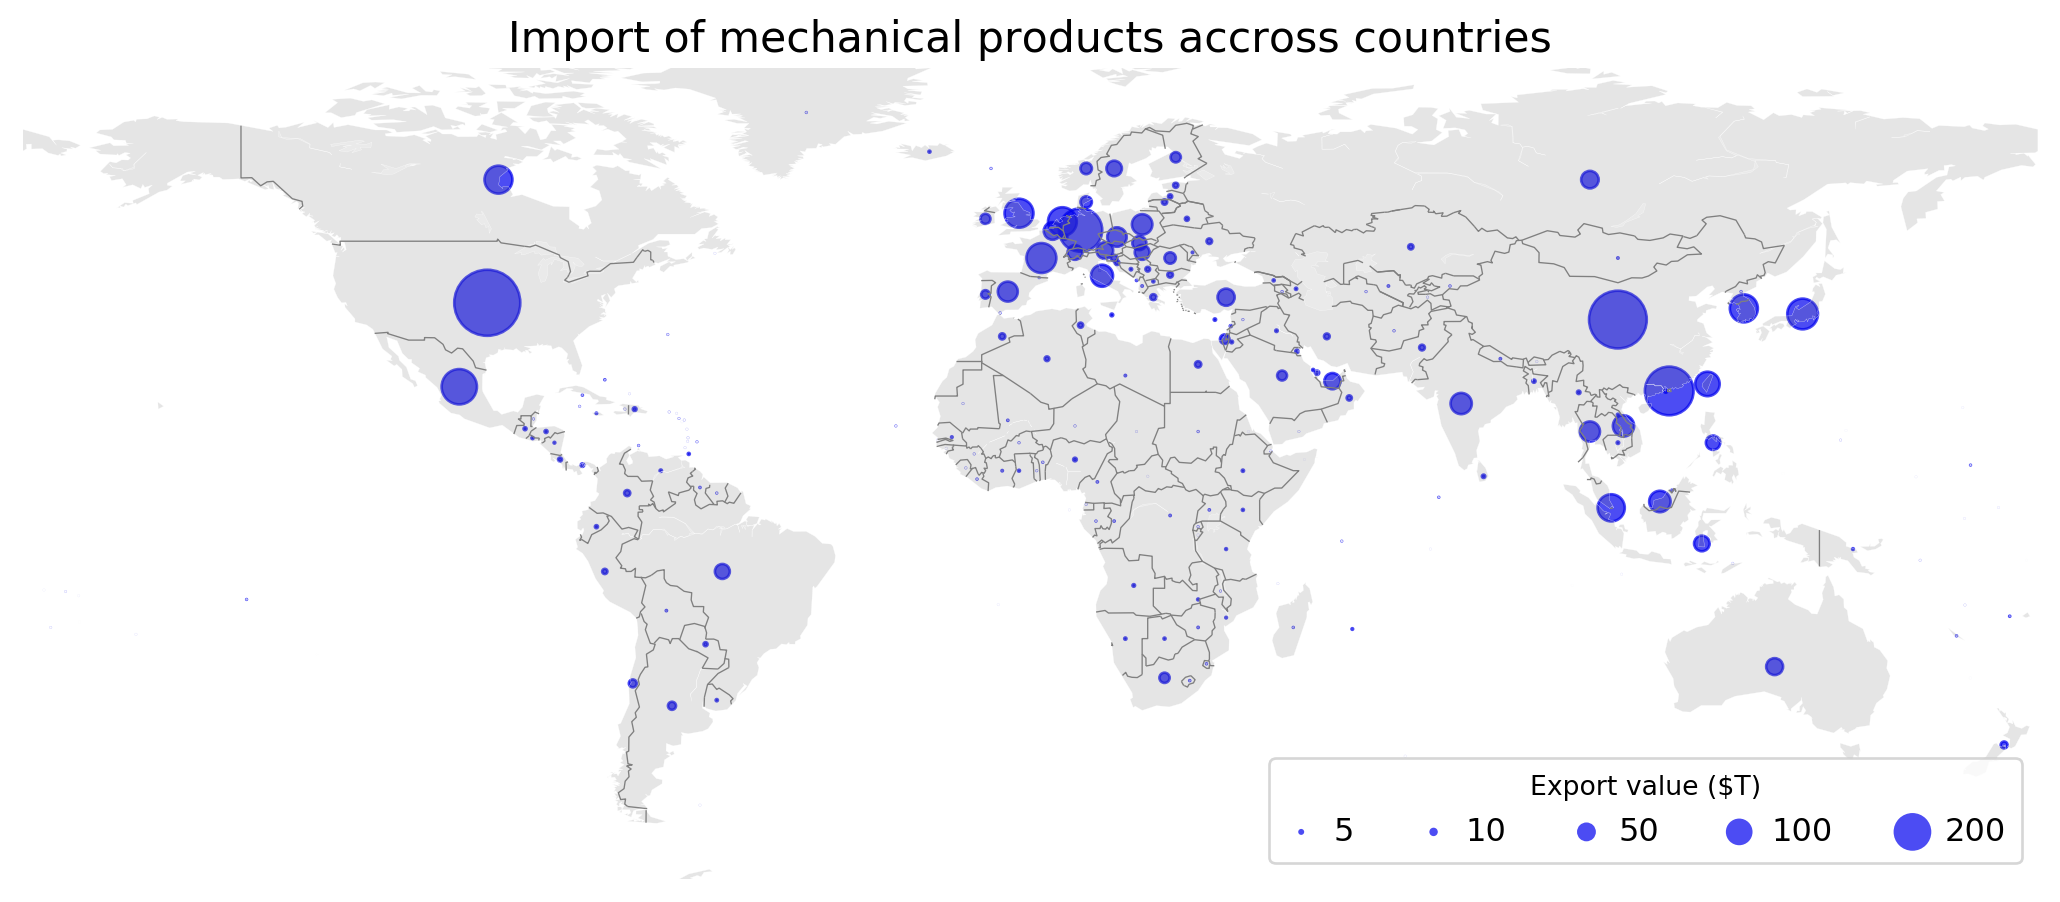

In [83]:
good = 'mechanical products'
df_export_good_geo = goods_import_export(df_group_category_85, False)
basemap_plot(df_export_good_geo, good, False)

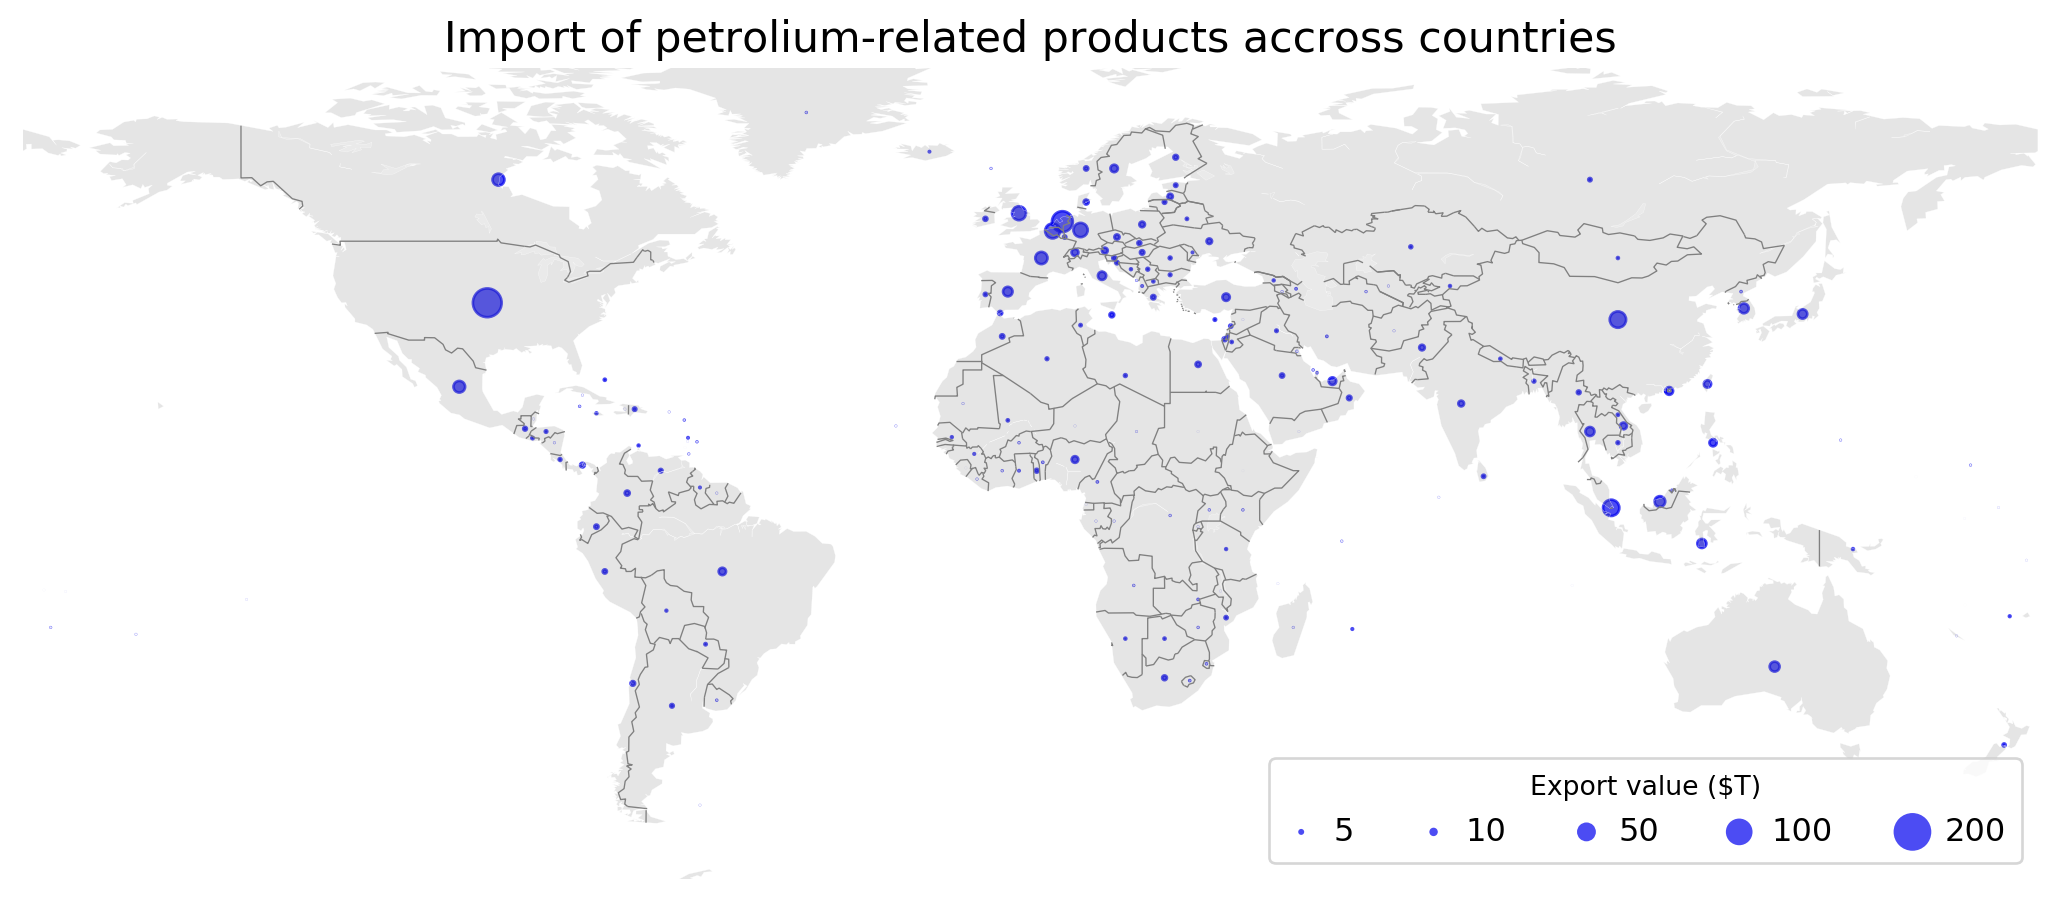

In [84]:
df_group_category_27 = df_clean[df_clean['category_code'] == 27]
df_export_good_geo = goods_import_export(df_group_category_27, False)
good = 'petrolium-related products'
basemap_plot(df_export_good_geo, good, False)

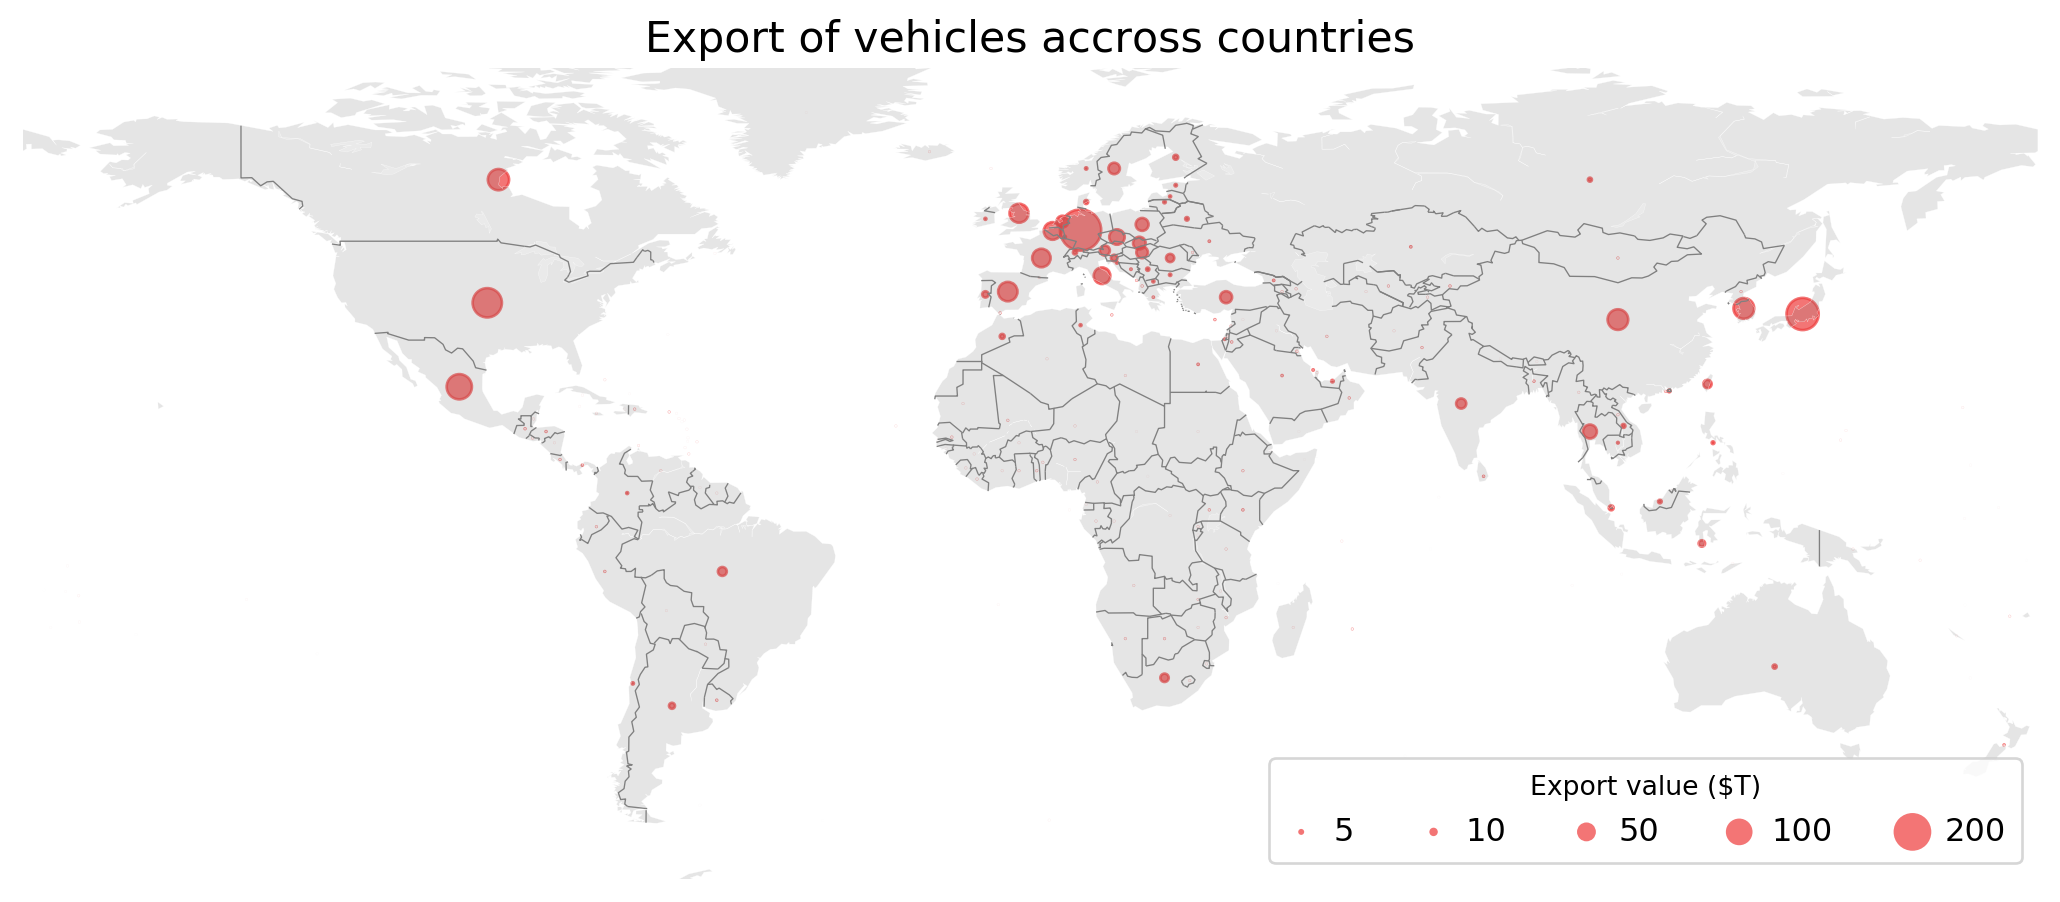

In [73]:
df_group_category_87 = df_clean[df_clean['category_code'] == 87]
df_export_good_geo = goods_import_export(df_group_category_87)
good = 'vehicles'
basemap_plot(df_export_good_geo, good)

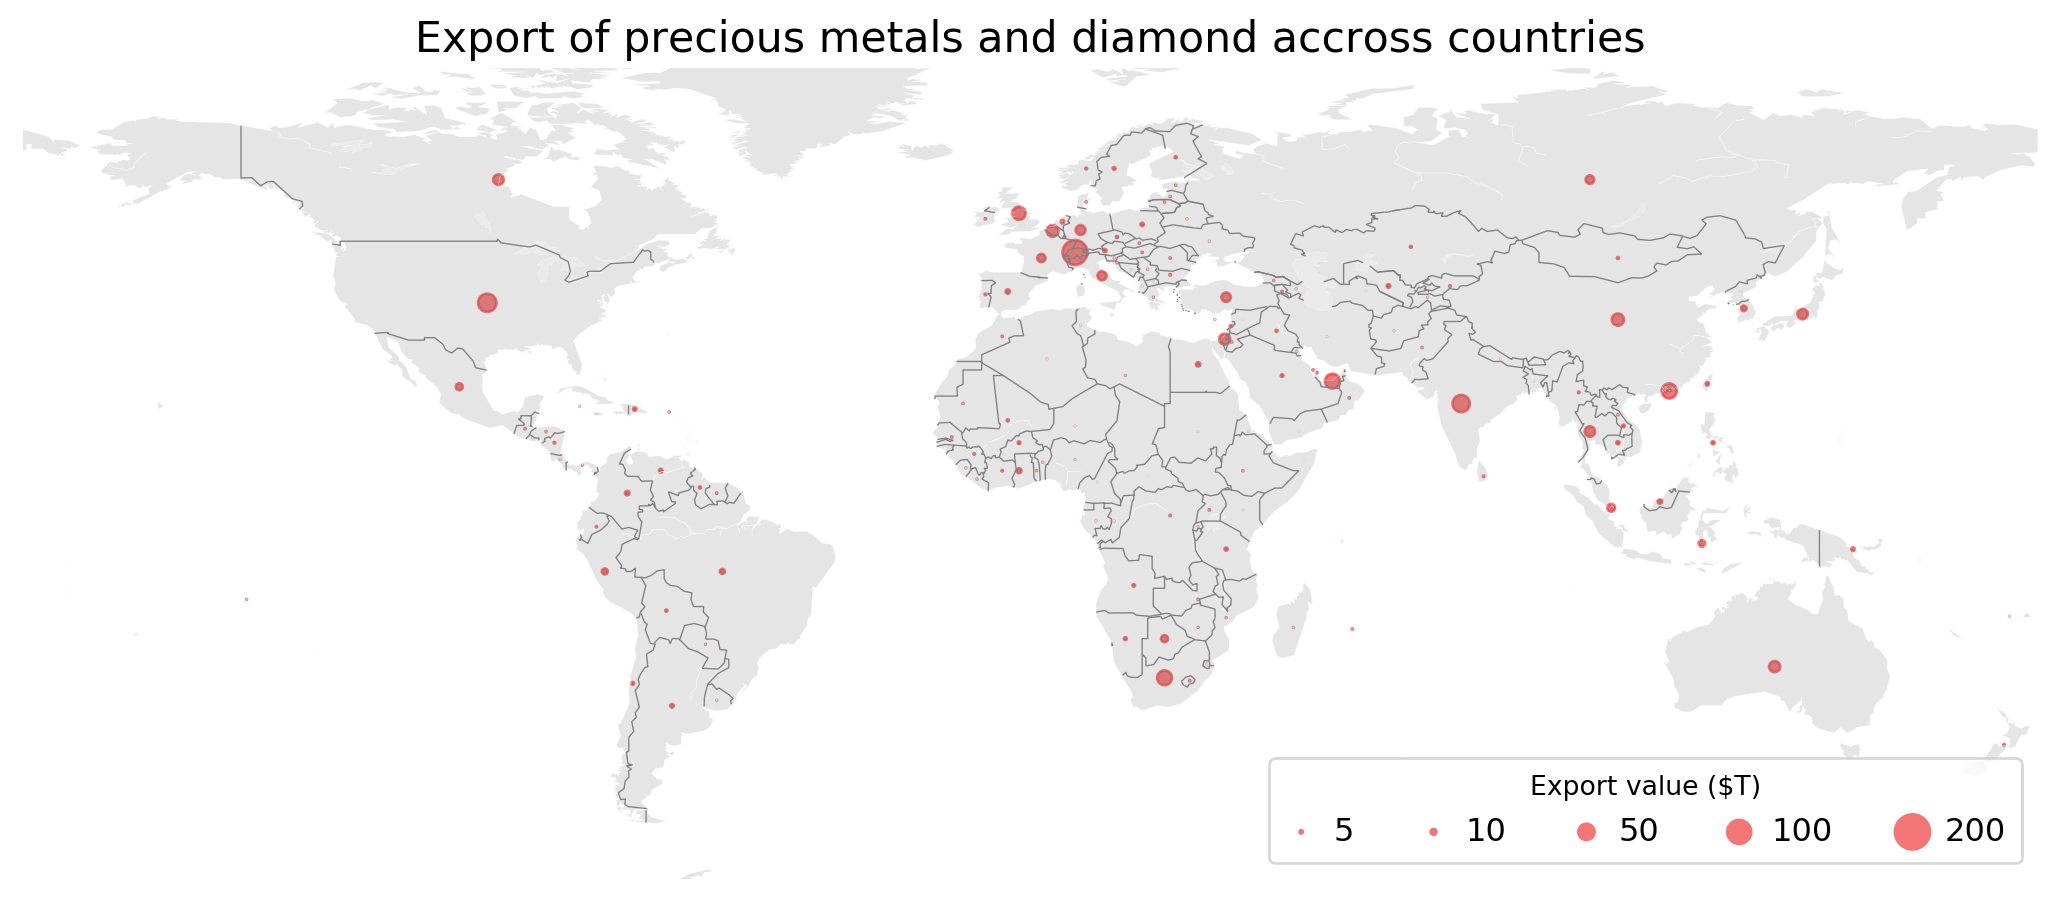

In [74]:
df_group_category_71 = df_clean[df_clean['category_code'] == 71]
df_export_good_geo = goods_import_export(df_group_category_71)
good = 'precious metals and diamond'
basemap_plot(df_export_good_geo, good)

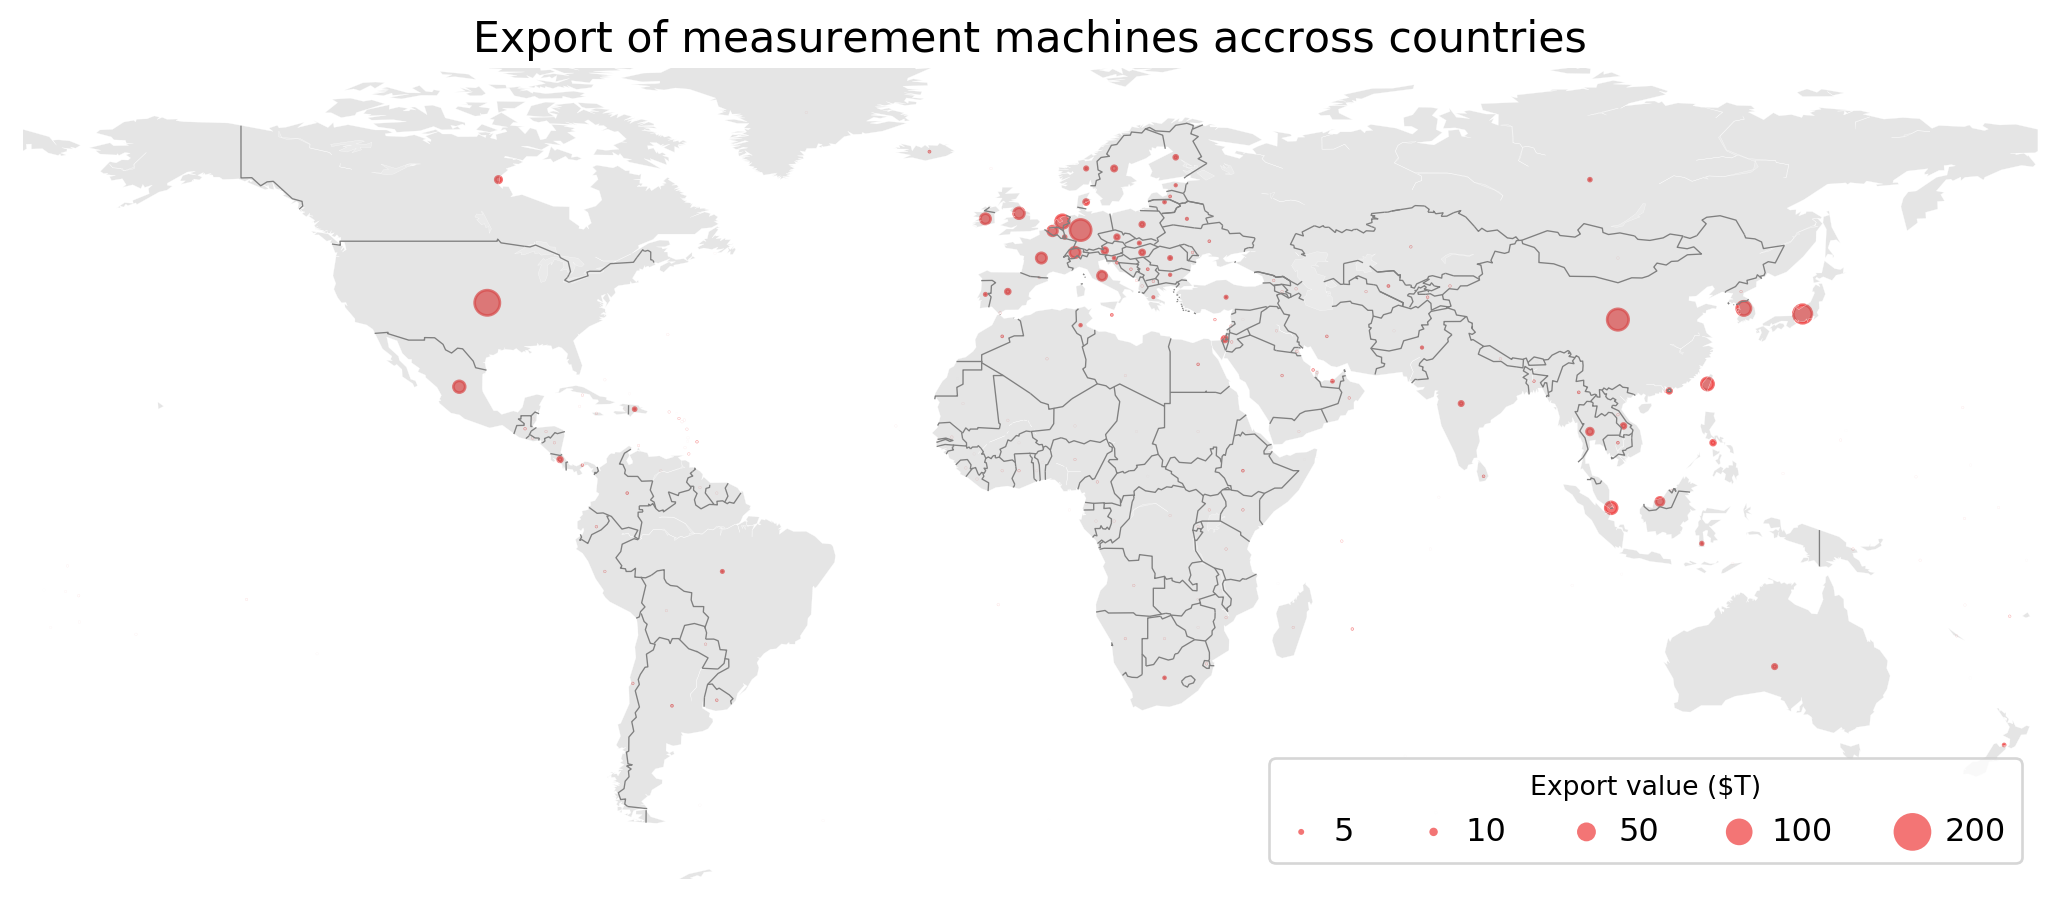

In [76]:
df_group_category_90 = df_clean[df_clean['category_code'] == 90]
df_export_good_geo = goods_import_export(df_group_category_90)
good = 'measurement machines'
basemap_plot(df_export_good_geo, good)

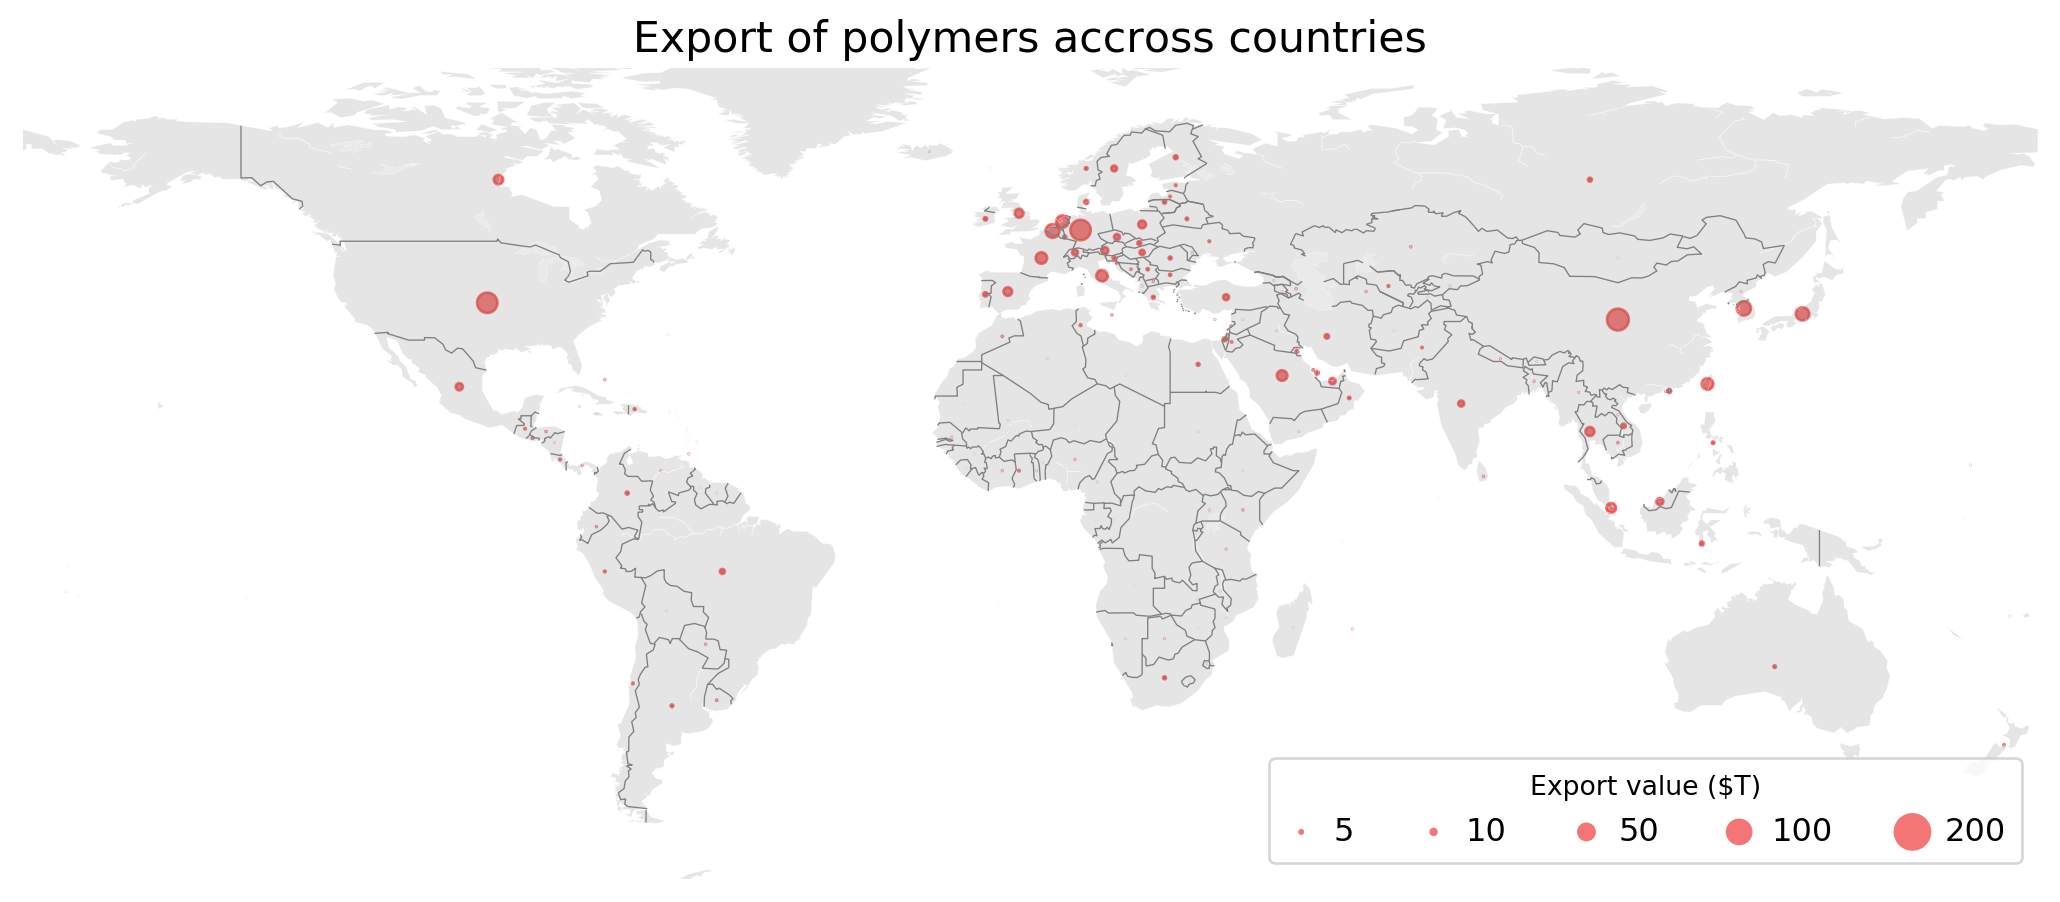

In [77]:
df_group_category_39 = df_clean[df_clean['category_code'] == 39]
df_export_good_geo = goods_import_export(df_group_category_39)
good = 'polymers'
basemap_plot(df_export_good_geo, good)